In [4]:
import torch
import numpy as np
from torch import nn

weights = 0.7
bias = 0.2

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step)
y = weights * X + bias

In [5]:
X[:10], y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.2000, 0.2140, 0.2280, 0.2420, 0.2560, 0.2700, 0.2840, 0.2980, 0.3120,
         0.3260]))

In [7]:
## Train Test Split
split_index = int(0.8 * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [13]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train,
                     test_data =X_test,
                     train_labels = y_train,
                     test_labels = y_test,
                     predictions=None):
    
    plt.figure(figsize=(10,7))
    ##Plot Training Data in green
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    ##Plot Test data in Green
    plt.scatter(test_data, test_labels, c="g", s=5, label="Test Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

    #Plot the legend
    plt.legend(prop={"size":14})

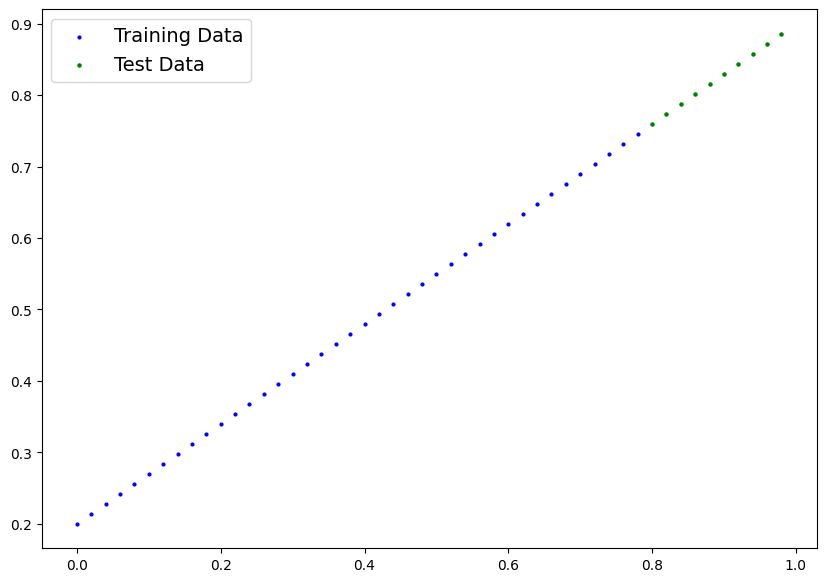

In [14]:
plot_predictions(X_train,X_test,y_train,y_test)

## Build the Model

In [29]:
class CustomLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True,
                                             dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [34]:
torch.manual_seed(42)
#Initialize the Linear Regression
model_0 = CustomLinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [37]:
## Making the predictions
with torch.inference_mode(): #Similar to with torch.no_grad()
    y_preds = model_0(X_test)

y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

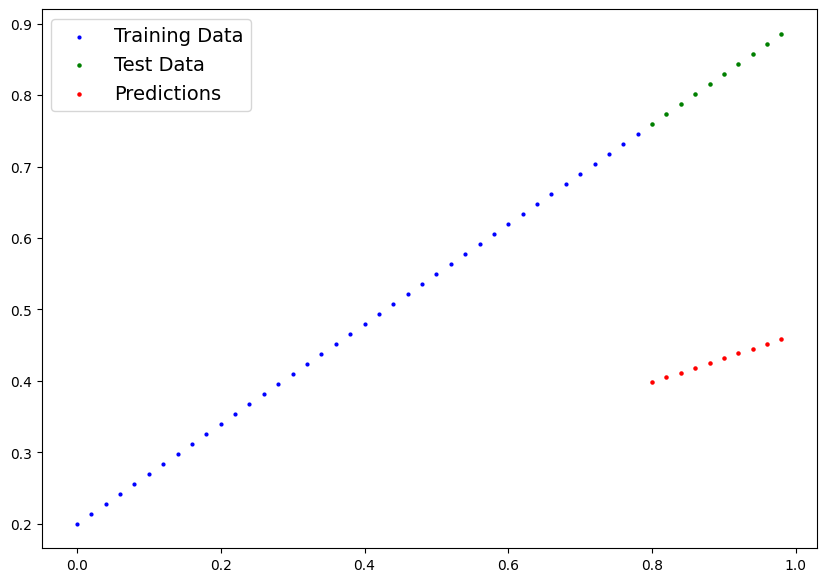

In [38]:
plot_predictions(X_train,X_test,y_train,y_test,y_preds)

In [39]:
torch.__version__

'2.6.0+cpu'

In [49]:
max_epoch = 100
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.01)

for epoch in range(max_epoch):

    #Put Model on Training Mode
    model_0.train()

    #1. Forward pass of train data in the model
    y_pred = model_0(X_train)

    #2. Calculate the Loss between y_pred and train True values
    train_loss = loss_fn(y_pred, y_train)

    ##3. Optimizer Zero Grad -> to restrict the gradient accumulation
    optimizer.zero_grad()

    ##4. Loss Backward Propagation
    train_loss.backward()

    ##5. Process the Optimizer to update teh weights
    optimizer.step()

    ##Put teh Model in eval mode
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        
        #Test Loss
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        #Print out 
        if epoch %10 == 0:
            print(f"Epoch : {epoch} | Train Loss : {train_loss} | Test Loss : {test_loss}")

Epoch : 0 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226
Epoch : 10 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226
Epoch : 20 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226
Epoch : 30 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226
Epoch : 40 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226
Epoch : 50 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226
Epoch : 60 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226
Epoch : 70 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226
Epoch : 80 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226
Epoch : 90 | Train Loss : 0.004262552596628666 | Test Loss : 0.005269003100693226


In [50]:
#len(updated_test_predictions)
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)

y_preds

tensor([0.7525, 0.7663, 0.7802, 0.7940, 0.8079, 0.8217, 0.8356, 0.8494, 0.8632,
        0.8771])

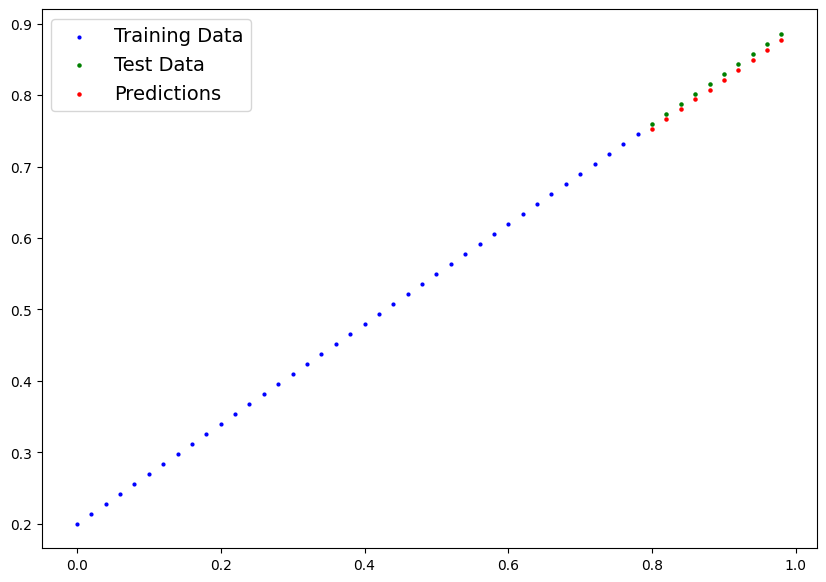

In [51]:
plot_predictions(X_train,X_test,y_train,y_test,y_preds)